In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# EDA

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Age Wise Anaemic Count

In [4]:
anaemia_data = df[df['anaemia']==1]
anemia_age_count = (anaemia_data.groupby(['age']).size())
anemia_age_count_sorted = anemia_age_count.sort_values(ascending=False)

Text(0.5, 1.0, 'Age Wise Anaemic Count')

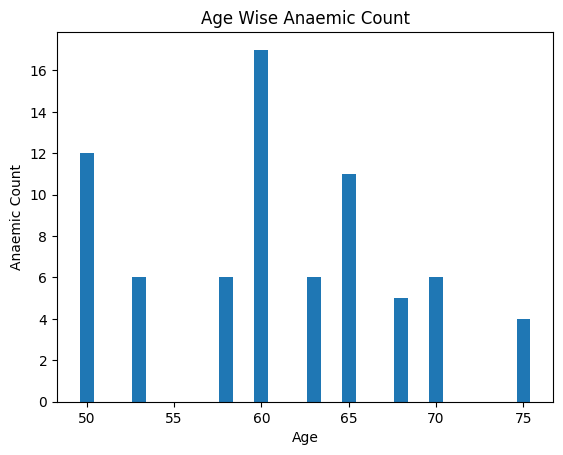

In [5]:
plt.bar(anemia_age_count_sorted.index[0:9], anemia_age_count_sorted.values[0:9])
plt.xlabel('Age')
plt.ylabel('Anaemic Count')
plt.title('Age Wise Anaemic Count')

## Age Wise Diabetic Count

In [6]:
diabetes_data = df[df['diabetes']==1]
diabetes_age_count = (diabetes_data.groupby(['age']).size())
diabetes_age_count_sorted = diabetes_age_count.sort_values(ascending=False)

Text(0.5, 1.0, 'Age Wise Diabetic Count')

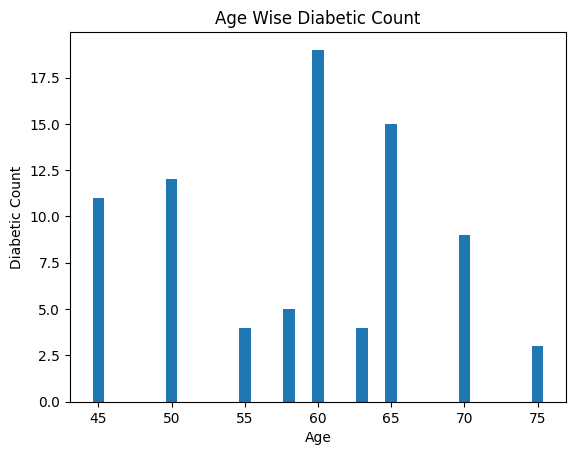

In [7]:
plt.bar(diabetes_age_count_sorted.index[0:9], diabetes_age_count_sorted.values[0:9])
plt.xlabel('Age')
plt.ylabel('Diabetic Count')
plt.title('Age Wise Diabetic Count')

## Correlation Between Anaemia and High Blood Pressure

In [8]:
correlation = df['anaemia'].corr(df['high_blood_pressure'])
print("Correlation between diabetes and high blood pressure:", correlation)

Correlation between diabetes and high blood pressure: 0.038182002732426924


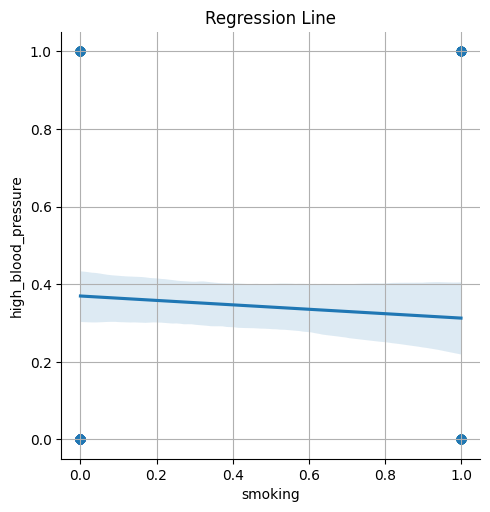

In [9]:
sns.lmplot(x='smoking', y='high_blood_pressure', data=df, scatter_kws={'alpha': 0.5})
plt.xlabel('smoking')
plt.ylabel('high_blood_pressure')
plt.title('Regression Line')
plt.grid(True)
plt.show()


## Correlation Between Creatinine_Phosphokinase and Platelets

In [10]:
correlation = df['creatinine_phosphokinase'].corr(df['platelets'])
print("Correlation between creatinine_phosphokinase and high platelets:", correlation)

Correlation between creatinine_phosphokinase and high platelets: 0.024463388519574105


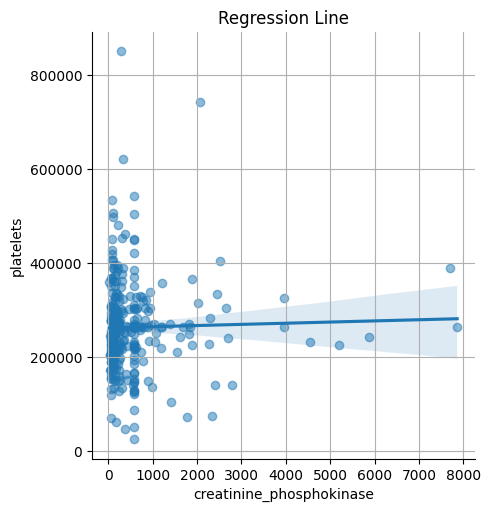

In [11]:
sns.lmplot(x='creatinine_phosphokinase', y='platelets', data=df, scatter_kws={'alpha': 0.5})
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('platelets')
plt.title('Regression Line')
plt.grid(True)
plt.show()

## Correlation between Serum_sodium and Platelets

In [12]:
correlation = df['serum_sodium'].corr(df['platelets'])
print("Correlation between serum_sodium and platelets:", correlation)

Correlation between serum_sodium and platelets: 0.06212461923840713


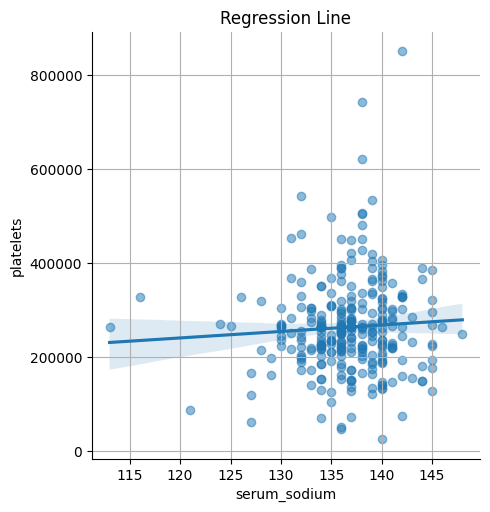

In [13]:
sns.lmplot(x='serum_sodium', y='platelets', data=df, scatter_kws={'alpha': 0.5})
plt.xlabel('serum_sodium')
plt.ylabel('platelets')
plt.title('Regression Line')
plt.grid(True)
plt.show()

## Correlation between Serum_sodium and Ejection_Fraction

In [14]:
correlation = df['ejection_fraction'].corr(df['serum_sodium'])
print("Correlation between ejection_fraction and serum_sodium:", correlation)

Correlation between ejection_fraction and serum_sodium: 0.1759022820079624


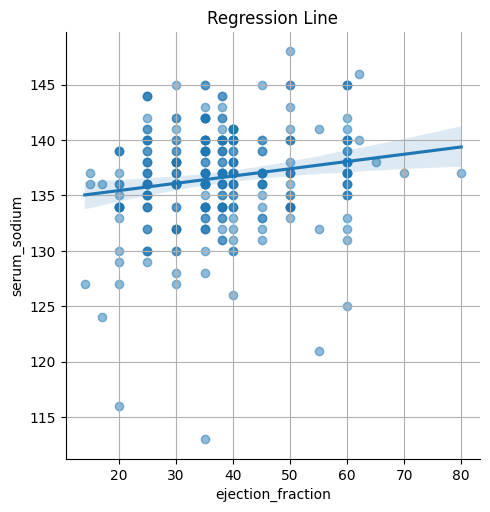

In [15]:
sns.lmplot(x='ejection_fraction', y='serum_sodium', data=df, scatter_kws={'alpha': 0.5})
plt.xlabel('ejection_fraction')
plt.ylabel('serum_sodium')
plt.title('Regression Line')
plt.grid(True)
plt.show()

## KDE Plot for Platelets

<Axes: xlabel='platelets', ylabel='Density'>

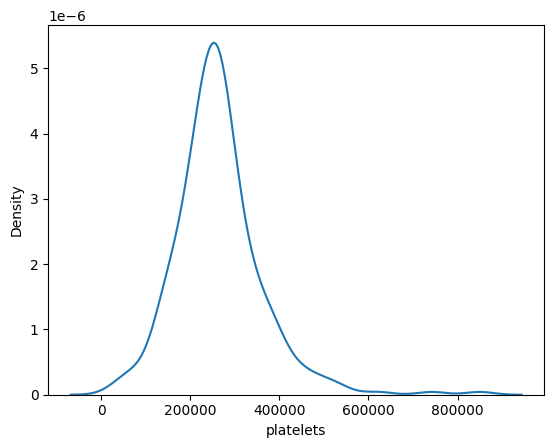

In [16]:
sns.kdeplot(df['platelets'])

## KDE Plot for Creatinine Phosphokinase

<Axes: xlabel='creatinine_phosphokinase', ylabel='Density'>

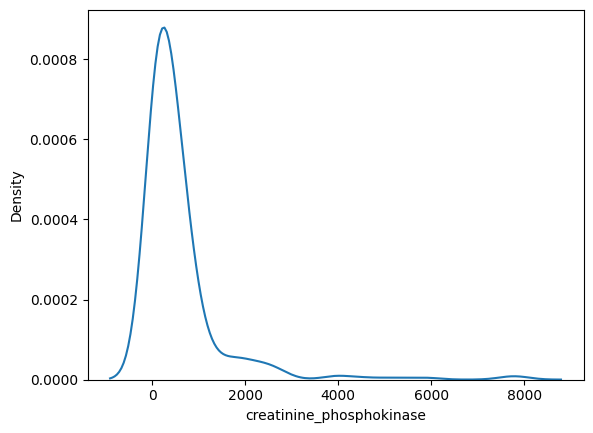

In [17]:
sns.kdeplot(df['creatinine_phosphokinase'])

## No. of Death

Text(0.5, 1.0, 'No. of People Died After Follow Up')

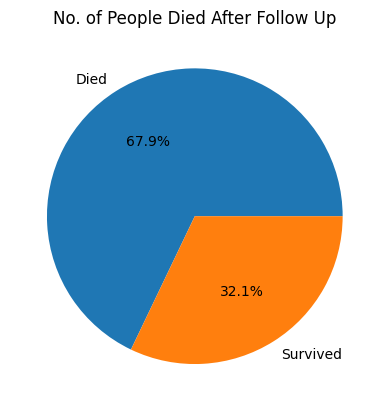

In [18]:
death_count = df["DEATH_EVENT"].value_counts()
death_labels = ["Died", "Survived"]
plt.pie(death_count, labels = death_labels, autopct='%1.1f%%')
plt.title('No. of People Died After Follow Up')

# Clustering

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score   

In [20]:
kmean_columns = ["age","sex","serum_sodium","smoking","platelets"]
df_features_selected = df[kmean_columns]

In [21]:
scaler = MinMaxScaler()

In [22]:
numerical_columns = ['age', 'serum_sodium', 'platelets']
categorical_columns = ['sex', 'smoking']

scaled_kmeans_df = df_features_selected.copy()

for c in numerical_columns:
    scaled_kmeans_df[c] = scaler.fit_transform(df_features_selected[[c]])

In [23]:
# scaled_kmeans_df_filtered = scaled_kmeans_df[(scaled_kmeans_df['age'].abs()<=3) & (scaled_kmeans_df['platelets'].abs()<=3) & (scaled_kmeans_df['serum_sodium'].abs()<=3)]
# scaled_kmeans_df_filtered.shape

## PCA

In [25]:
from sklearn.decomposition import PCA
if len(kmean_columns) > 2:
    pca = PCA(n_components=2)
    kmeans_pca = pca.fit_transform(scaled_kmeans_df)
    kmeans_pca_df = pd.DataFrame(kmeans_pca)
else:
    kmeans_pca_df = scaled_kmeans_df

# Elbow Method

In [26]:
inertia_lst = []
silhouette_score_lst = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(kmeans_pca_df)
    score = silhouette_score(kmeans_pca_df, kmeans.labels_, metric = 'euclidean')
    silhouette_score_lst.append(score)
    inertia_lst.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

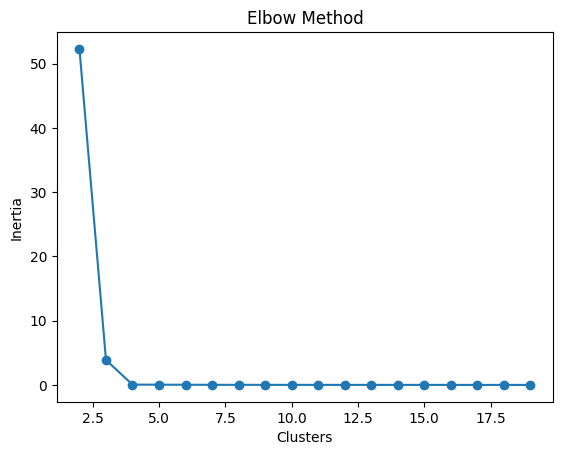

In [27]:
plt.plot(range(2,20), inertia_lst, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

Text(0, 0.5, 'Score')

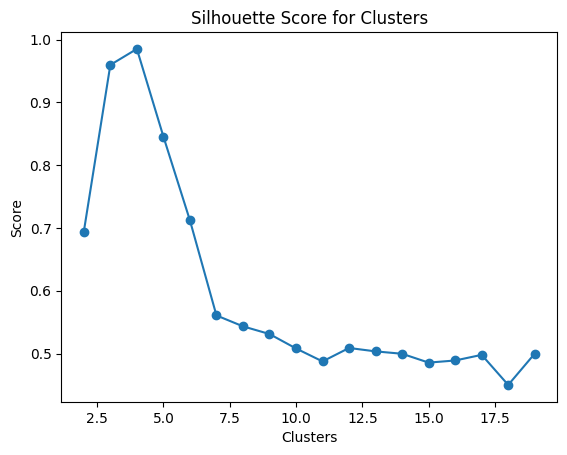

In [28]:
plt.plot(range(2,20), silhouette_score_lst, marker = 'o')
plt.title("Silhouette Score for Clusters")
plt.xlabel("Clusters")
plt.ylabel("Score")

In [29]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(kmeans_pca_df)

KMeans(n_clusters=4)

In [30]:
score=silhouette_score(kmeans_pca_df, kmeans.labels_, metric = 'euclidean')
score

0.9852766439688887

In [31]:
kmenas_cluster_counts = pd.Series(kmeans.labels_).value_counts()

In [32]:
kmenas_cluster_counts

2    102
1    101
0     92
3      4
Name: count, dtype: int64

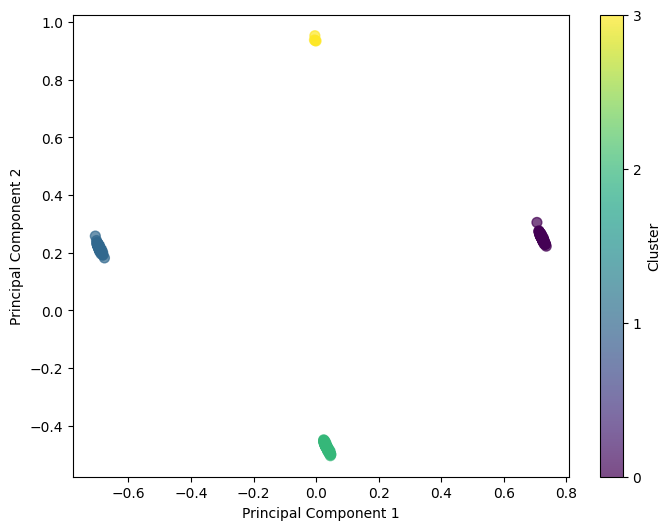

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(kmeans_pca_df[0], kmeans_pca_df[1], c = kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar()
cbar.set_label('Cluster')
cbar.set_ticks(range(len(set(kmeans.labels_))))
cbar.set_ticklabels(range(len(set(kmeans.labels_))))

# Hierarchical Clustering

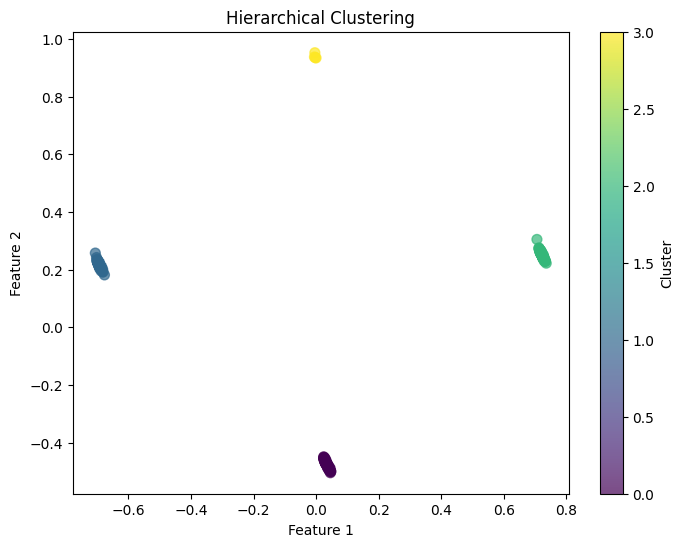

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_clustering.fit_predict(kmeans_pca_df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(kmeans_pca_df[0], kmeans_pca_df[1], c=agg_clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


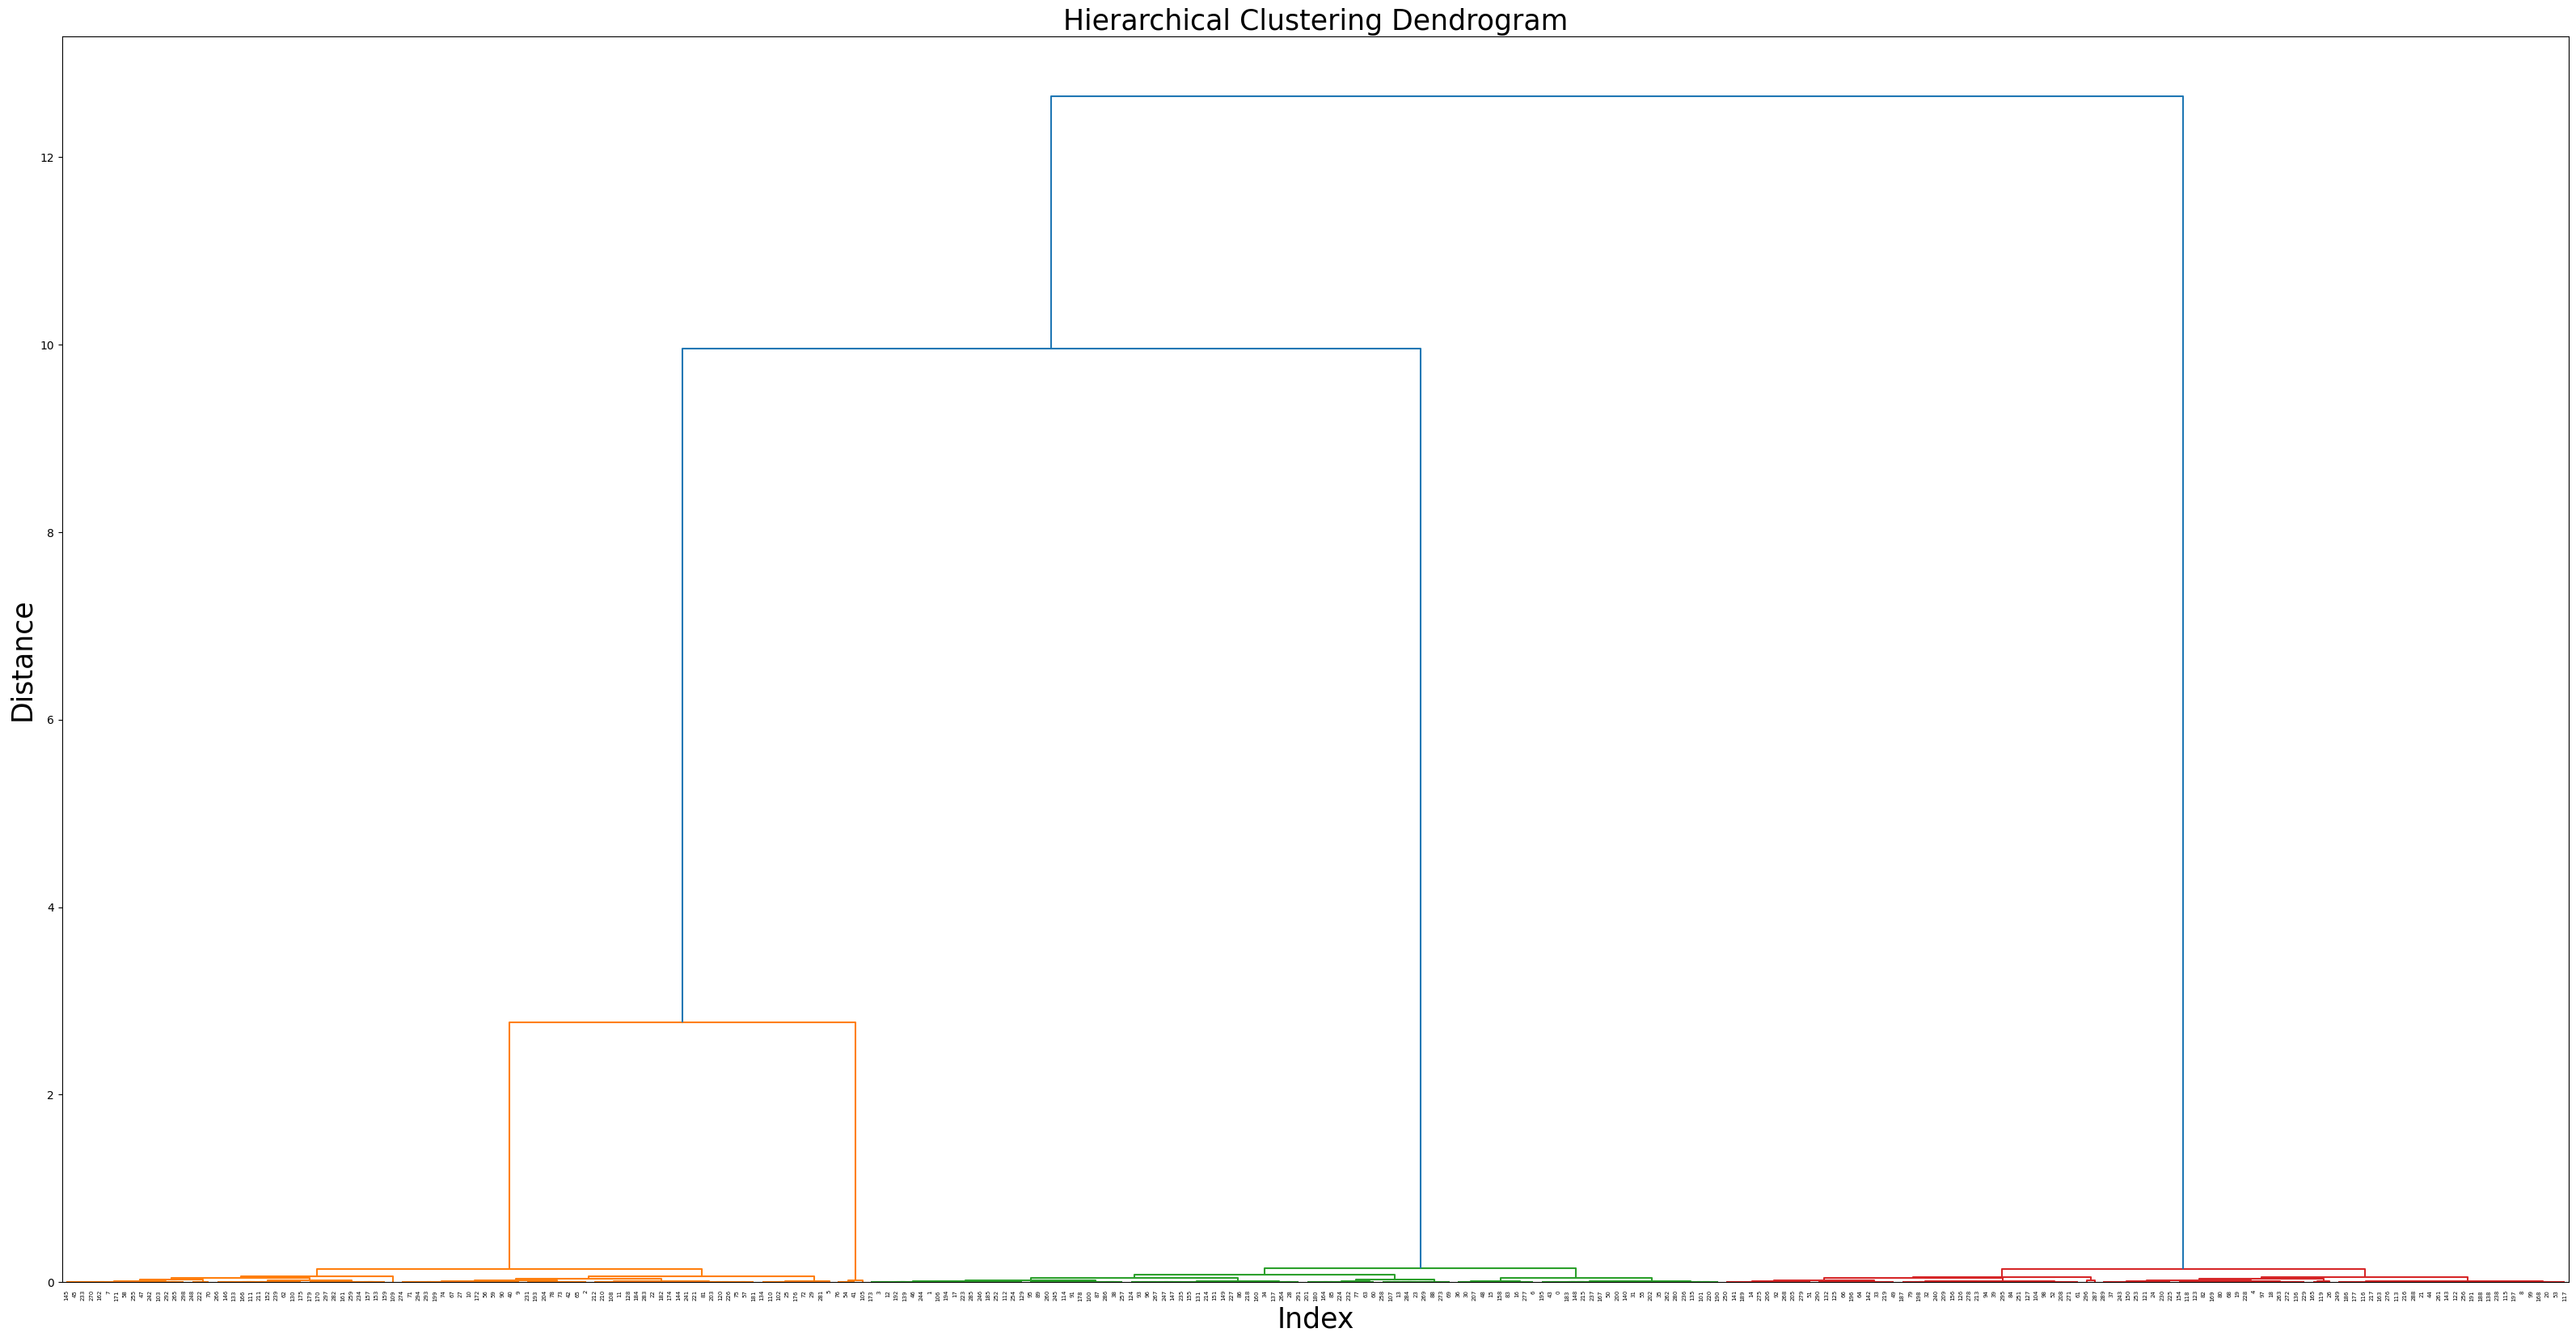

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(kmeans_pca_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(40, 20))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 25)
plt.xlabel('Index', fontsize = 25)
plt.ylabel('Distance', fontsize = 25)
plt.show()


# DBSCAN Clustering

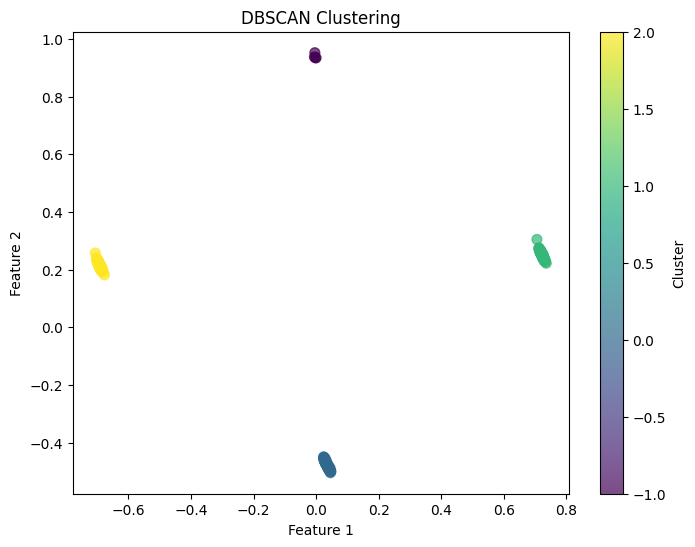

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_clusters = dbscan.fit_predict(kmeans_pca_df)

plt.figure(figsize=(8, 6))
plt.scatter(kmeans_pca_df[0], kmeans_pca_df[1], c=dbscan_clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


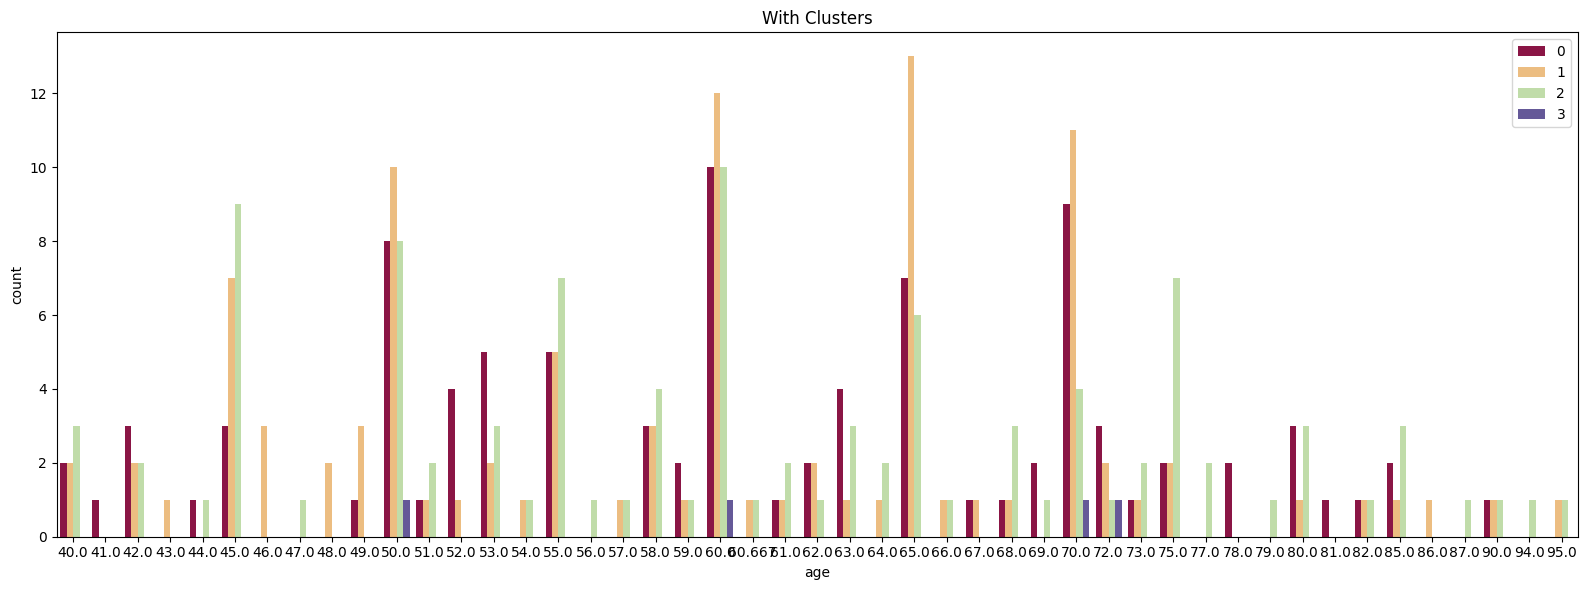

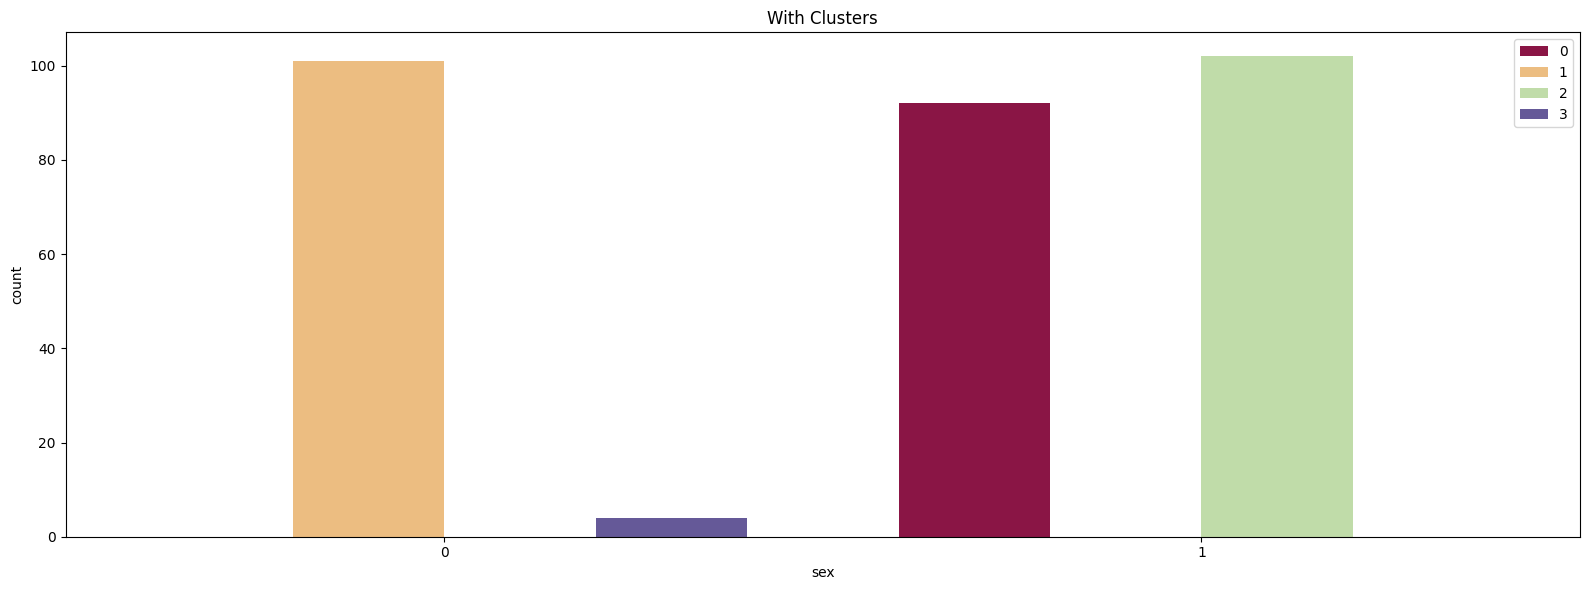

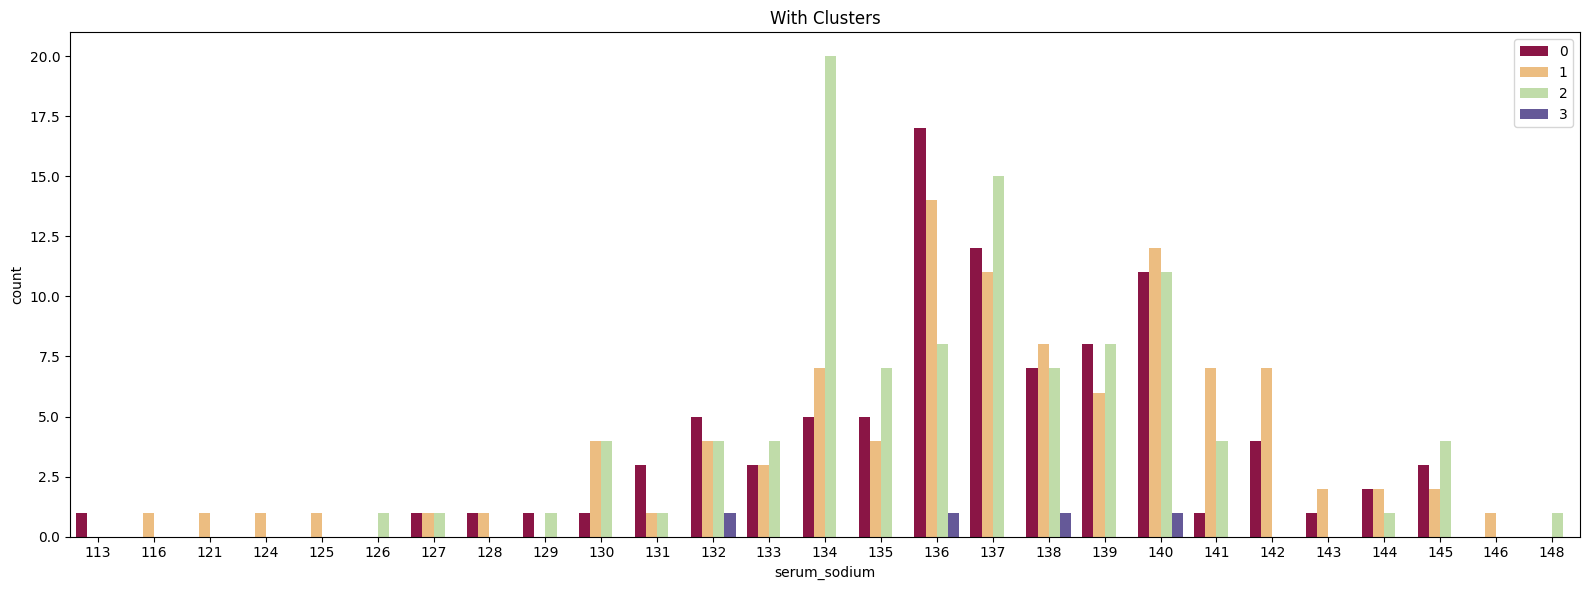

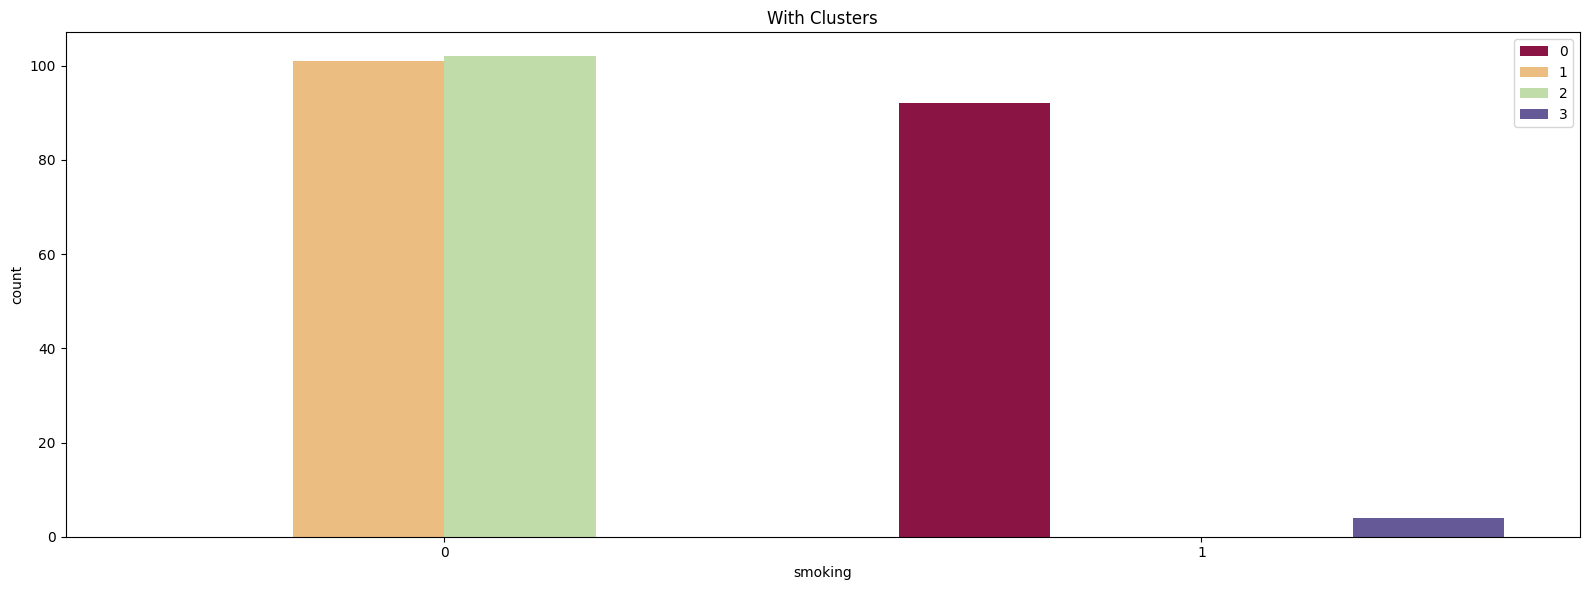

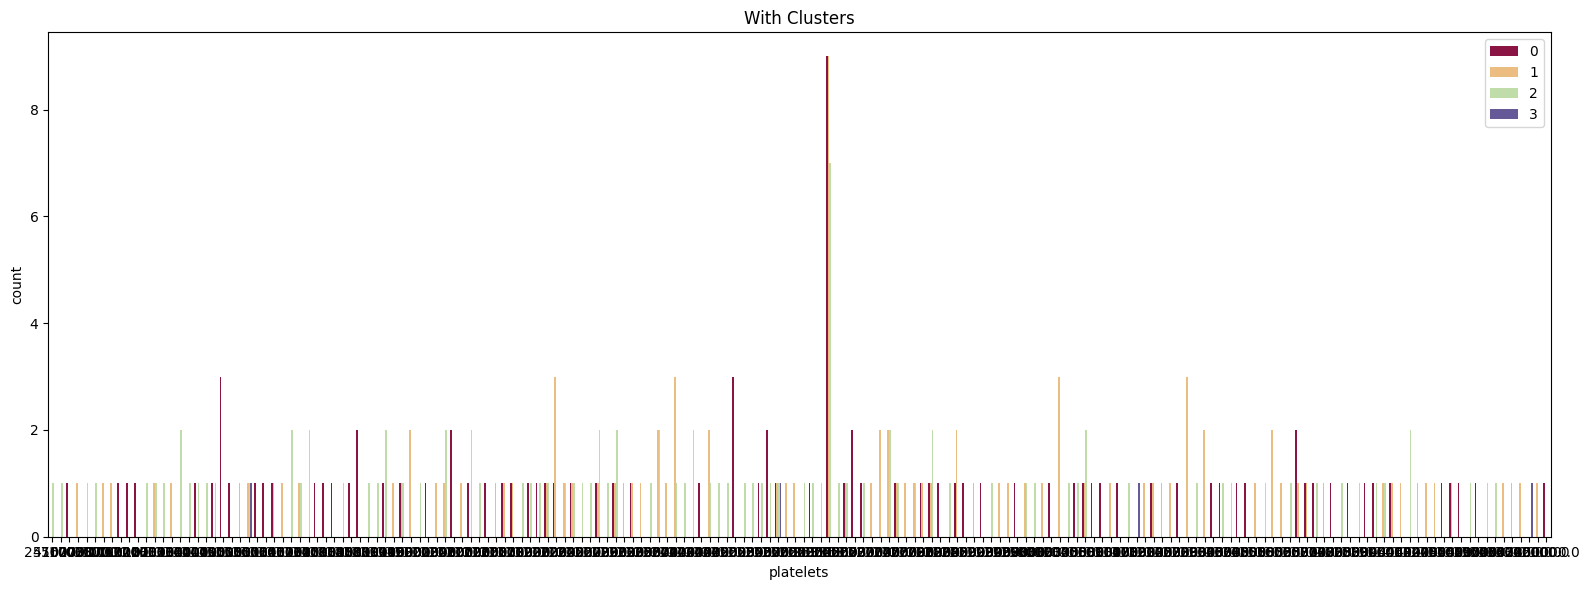

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'categorical_columns' contains the list of categorical columns
for i in kmean_columns:
    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 1, figsize=(16, 6))
    
    # Plot the countplot for the first subplot
    ax1 = sns.countplot(data=df, x=i, hue=kmeans.labels_, palette='Spectral', )
    ax1.set_title('With Clusters')
    
    # # Plot the countplot for the second subplot
    # ax2 = sns.countplot(data=df, x=i, palette='Spectral', ax=axes[1])
    # ax2.set_title('Without Clusters')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()
